# Pandas 3
### Name
Dylan Skinner
### Class
### Date
27 April 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [14]:
def prob1():
    """
    Use groupby objects to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    For each column return the values of the describe function
    for the type of university with the higher mean.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    # Read in the data
    college = pd.read_csv("college.csv")

    # Group by private and public universities.
    uni_type = college.groupby("Private")
    
    # Get public and private split
    public, private = uni_type.get_group("No"), uni_type.get_group("Yes")

    # Get list of data we are looking for.
    info_array = [[public["S.F.Ratio"], private["S.F.Ratio"]],
                  [public["Top10perc"], private["Top10perc"]], 
                  [public["Top25perc"], private['Top25perc']]]
    
    # Get the indicies for the schools with the highest in each category.
    indicies = [np.argmax([public["S.F.Ratio"].mean(), private["S.F.Ratio"].mean()]),
                np.argmax([public["Top10perc"].mean(), private["Top10perc"].mean()]), 
                np.argmax([public["Top25perc"].mean(), private["Top25perc"].mean()])]
    
    # Loop through and get what we are looking for.
    info = [info_arr[index] for info_arr, index in zip(info_array, indicies)]
    
    # Return desired information.
    return info[0].describe().to_numpy(), info[1].describe().to_numpy(), info[2].describe().to_numpy()


In [15]:
prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

In [18]:
college = pd.read_csv('college.csv')
print(college.columns)

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')


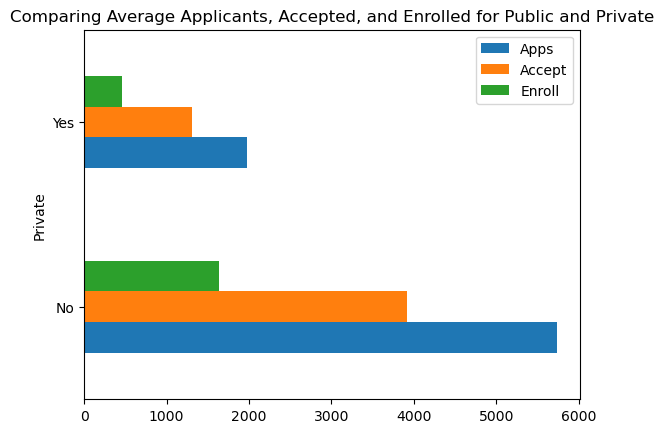

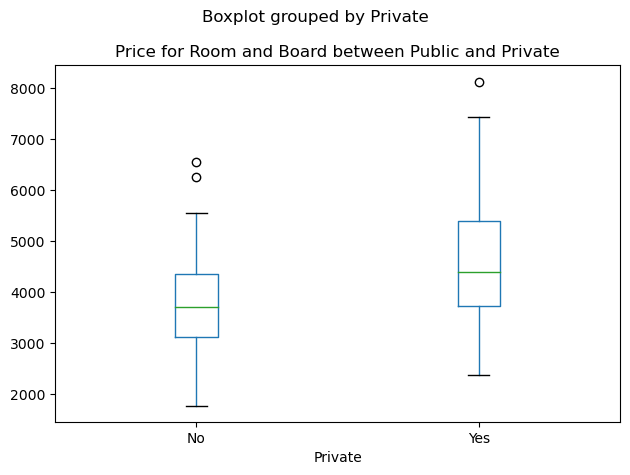

In [32]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    # Read in data
    college = pd.read_csv("college.csv")

    # Get groupby
    priv = college.groupby("Private")

    # Compare number of applicants, accepted applicants, and enrolled applicants between private and public universities.
    priv[["Apps", "Accept", "Enroll"]].mean().plot(kind="barh", title="Comparing Average Applicants, Accepted, and Enrolled for Public and Private")

    # Range of price for room and board
    college.boxplot(["Room.Board"], by="Private", grid=False)
    plt.title("Price for Room and Board between Public and Private")
    plt.tight_layout()


prob2()

# Problem 3

In [50]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination makes the most money in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week per person?
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    # Read in data
    ohio = pd.read_csv("Ohio_1999.csv")

    # Question 1. Find race/sex combo with highest Usual Weekly Earnings
    ques1_pt = ohio.pivot_table(values="Usual Weekly Earnings", columns="Sex", index="Race", aggfunc="max")
    ques1 = tuple(ques1_pt.stack().idxmax())
    
    # Question 2. Find race/sex combo with least amount of cumulative hours worked.
    ques2_pt = ohio.pivot_table(values="Usual Hours Worked", columns="Sex", index="Race", aggfunc="sum")
    ques2 = tuple(ques2_pt.stack().idxmin())

    # Question 3. Find race/sex combo with most hours per week per person worked.
    ques3_pt = ohio.pivot_table(values="Usual Hours Worked", columns="Sex", index="Race", aggfunc="mean")
    ques3 = tuple(ques3_pt.stack().idxmax())

    # Return findings
    return ques1, ques2, ques3

prob3()


((1, 1), (3, 2), (3, 1))

# Problem 4

In [51]:
d = pd.read_csv("Ohio_1999.csv")
print(d.columns)

Index(['Usual Weekly Earnings', 'Usual Hours Worked', 'Age',
       'Educational Attainment', 'Race', 'Sex', 'Yearly Salary'],
      dtype='object')


In [71]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    # Read in data
    ohio = pd.read_csv("Ohio_1999.csv")

    # Question 1. Most common degree among workers.
    degree = pd.cut(ohio['Educational Attainment'], [0, 38, 42, 47])  # Cut appropriate partitioning.
    q1 = degree.value_counts().idxmax()
    
    # Question 2. Parition Age column into 6 equally sized groups. Which interval had highest hours worked.
    age = pd.qcut(ohio["Age"], 6)  # 6 groupings.
    q2_pt = ohio.pivot_table(values="Usual Hours Worked", index=age, aggfunc="max")
    q2 = q2_pt.idxmax()

    # Question 3. What degree/age combination has smallest yearly salary on average.
    q3_pt = ohio.pivot_table(values="Yearly Salary", index=age, columns=degree, aggfunc="mean")
    q3 = q3_pt.stack().idxmin()
    
    return q1, q2, q3

prob4()

(Interval(38, 42, closed='right'),
 Usual Hours Worked    (40.0, 46.0]
 dtype: interval,
 (Interval(15.999, 29.0, closed='right'), Interval(0, 38, closed='right')))

# Problem 5

In [95]:
def prob5():
   """
   Use pivot tables and groupby objects on the data in
   College.csv to answer the following questions:
      1. Is there a correlation between the percent of alumni
         that donate and the amount the school spends per
         student in both private and public universities?
      2. Is the graduation rate partition with the greatest
         number of schools the same for private and public
         universities?
      3. Is there an inverse correlation between acceptance
         rate and having students from the top 10% of their
         high school class?
      4. Why is the average percentage of students admitted
         from the top 10 percent of their high school class
         so high in private universities with very low
         acceptance rates? Use only the data to explain why; 
         do not extrapolate.
   
   Returns:
      ans_1 (bool): answer to question 1
      ans_2 (bool): answer to question 2
      ans_3 (bool): answer to question 3
      ans_4 (str): answer to question 4
   """
   # Read in data
   college = pd.read_csv("college.csv")
   college["Acceptance Rate"] = college["Accept"] / college["Apps"]

   # Question 1. Is there a correlation between percent alumni who donate and amount schools spend on students in
      # both public and private universities?
   uni_type = college.groupby("Private")
   private, public = uni_type.get_group("Yes"), uni_type.get_group("No")
   corr_matrix1 = uni_type[["Expend", "perc.alumni"]].corr()
   ans_1 = False

   # Question 2. Is the graduation rate partition the same between private and public schools?
   grad_priv = pd.cut(private["Grad.Rate"], [0, 20, 40, 60, 80, 100])
   grad_pub = pd.cut(public["Grad.Rate"], [0, 20, 40, 60, 80, 100])
   ans_2 = grad_priv.value_counts().idxmax() == grad_pub.value_counts().idxmax()

   # Question 3. Is there inverse correlation between acceptance rate and having students from top 10% of their class?
   college["Acceptance Rate"] = college["Accept"] / college["Apps"]
   corr_matrix3 = uni_type[["Acceptance Rate", "Top10perc"]].corr()
   ans_3 = True

   # Question 4. Why is the average percentage of students admitted from top10 so high in private unis with very low acceptance rates.
   accept_rate = pd.qcut(college["Acceptance Rate"], 4)
   q4_pt = college.pivot_table(values="Top10perc", index="Private", columns=[accept_rate], aggfunc="count")
   print(q4_pt)
   ans_4 = "Private Colleges with low acceptance rates have more top10perc students applying, and thus can choose more of them."

   return ans_1, ans_2, ans_3, ans_4

prob5()

Acceptance Rate  (0.153, 0.676]  (0.676, 0.779]  (0.779, 0.849]  (0.849, 1.0]
Private                                                                      
No                           72              56              39            45
Yes                         123             138             155           149


(False,
 False,
 True,
 'Private Colleges with low acceptance rates have more top10perc students applying, and thus can choose more of them.')